In [66]:
# Turn on autoreload so code changes are automatically added.
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
# %matplotlib inline
%matplotlib widget

In [67]:
# Imports
import numpy as np
import visualizers as viz
import util as ut
from scipy.spatial.transform import Rotation

In [68]:
# Variable Params
tf = 10.0                                   # final time (per trajectory)
zA = 1.5                                    # altitude for ALL points
xt = 0.1                                    # furthest x point (the tip)
z0 = 1.0                                    # nearest z point
z1 = 1.5                                    # furthest z point (the tip)
qA = np.array([1.00, 0.00, 0.00, 0.00])     # orientation for ALL points
psi_off = 0*np.pi/3                           # Yaw offset
d_off = 5                                   # distance offset (l2-norm from target)

# Fixed Params
hz = 20        

In [69]:
# # Line =======================================
# name = "line"

# # Generate Trajectory
# N = int(tf*hz+1)
# Nhf = ((N-1)//2)
# T = np.linspace(0.0,tf,N)

# x1 = np.linspace(0,xt,Nhf+1)
# x2 = np.flip(x1)

# X = np.zeros((13,N))
# X[0,:] = np.hstack((x1,x2[1:]))
# X[2,:] = zA
# X[6:10,:] = qA.reshape((4,1))


In [70]:
# Climb =======================================
name = "climb"

# Generate Trajectory
N = int(tf*hz+1)
Nhf = ((N-1)//2)
T = np.linspace(0.0,tf,N)

z1 = np.linspace(z0,z1,Nhf+1)
z2 = np.flip(z1)

X = np.zeros((13,N))
X[2,:] = np.hstack((z1,z2[1:]))
X[6:10,:] = qA.reshape((4,1))

In [71]:
# # Selfie =======================================
# name = "selfie"

# # Useful Stuff
# tw = np.array([0.00,0.00,1.00])
# c0 = np.array([0.00,0.00,0.00]).reshape((3,1))
# c1 = np.array([0.00,0.00,0.00,1.00])
# N = int(tf*hz+1)
# Nhf = ((N-1)//2)

# # Outputs
# T = np.linspace(0.0,tf,N)
# X = np.zeros((13,N))

# # Generate Position
# x1 = np.linspace(0,xt,Nhf+1)
# x2 = np.flip(x1)

# pos = np.zeros((3,N))
# pos[0,:] = np.hstack((x1,x2[1:]))
# pos[2,:] = zA

# # Generate Yaw
# x2d = pos[:2, :]
# x_off = xt/2
# y_off = -np.sqrt(d_off**2-x_off**2)
# p = np.array([x_off, y_off]).reshape(2, 1)

# d = p - x2d
# yaw = np.arctan2(d[1, :], d[0, :])

# # Account for Global Yaw Transform
# R_off = Rotation.from_euler("z", psi_off).as_matrix()
# H_off = np.vstack((np.hstack((R_off,c0)),c1))

# for idx, psi in enumerate(yaw):
#     xc = np.array([ np.cos(psi), np.sin(psi), 0.0 ])
#     yc = np.array([-np.sin(psi), np.cos(psi), 0.0 ])

#     xb = ut.cross(yc,tw)/np.linalg.norm(ut.cross(yc,tw))
#     yb = ut.cross(tw,xb)/np.linalg.norm(ut.cross(tw,xb))
#     zb = ut.cross(xb,yb)

#     Rb = np.hstack((xb.reshape(3,1), yb.reshape(3,1), zb.reshape(3,1)))
#     Hb = np.vstack((np.hstack((Rb,pos[:,idx].reshape((3,1)))),c1))

#     Ho = H_off@Hb
#     xo = Ho[0:3,3]
#     qo = ut.rotm2quat(Ho[0:3,0:3])

#     X[0:3,idx] = xo
#     X[6:10,idx] = qo


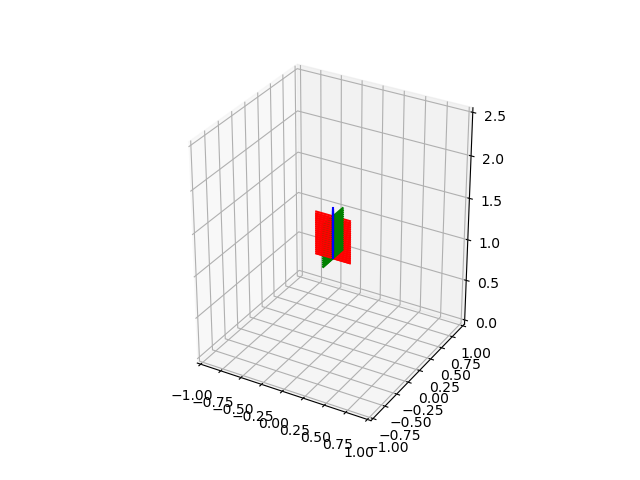

In [72]:
# Visualize
viz.trajviz([X],step=5)
# viz.trajanimate(X,X)

In [73]:
traj = np.vstack((T,X))
np.savetxt(name+".csv", traj, delimiter=",")


(201,) (13, 201)
